## Workflow and Automation

In the previous lecture we have introduced diferent types of tests and how to diagnose our code. In this lecture, we will see how these tools get integrated in a continuous workflow that we can be continuously feed so we can perform our tests both periodically and automatically. 

## 1. Running test automatically with PyTest

Let's see how to automatically run our tests using a test runner. There are different test runners supported in Python, including `unittest`, `nose` and `pytest`. For the purposes of this lecture, we will cover just `pytest`.

In this tutoral, we will comeback to our toy example for a small Python package. For this, we can use the contents in the repository `eratosthenes` located in the GitHub organization. You can also use for reference our [mytoy](https://github.com/fperez/mytoy) package. 

### 1.1. Running local tests

Let's now grab the code from our previous lecture on [Buiding Block](building-blocks.ipynb) and move to two different python scripts, one called `division.py` that inclides the function `division()` and other one called `test_division.py` with some simple unit tests. Don't forget to do the necessary imports! Remember that `test_division.py` needs to import the functions from `division.py`.

Once this setup is correct, you can directly run the `pytest` suite by typing `pystes`  in the terminal. This is how this should look like:

In [1]:
%%bash
cd division_testing
pytest

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0
rootdir: /home/jovyan/site/lectures/testing/division_testing
plugins: cov-4.0.0, notebook-0.6.1, anyio-3.6.2
collected 3 items

test_division.py ...                                                     [100%]

============================== 3 passed in 0.34s ===============================


In order to this to work, all tests must have names of the form `[Tt]est[-_]*`. We can also add more features to the test suite by adding new flags/arguments (see `pytest -h`  for more instructions). For example,  

In [8]:
%%bash
cd division_testing
pytest -v

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /srv/conda/envs/notebook/bin/python3.1
cachedir: .pytest_cache
rootdir: /home/jovyan/myGH/stat159-site/lectures/testing/division_testing
plugins: cov-4.0.0, notebook-0.6.1, anyio-3.6.2
collecting ... collected 3 items

test_division.py::test_float_division PASSED                             [ 33%]
test_division.py::test_int_division PASSED                               [ 66%]
test_division.py::test_neg_division PASSED                               [100%]

============================== 3 passed in 0.20s ===============================


### 1.2. Test suite for an installable package

Projects and packages in Python usually are desing so you can run the tests by just running the `pytest` command from the source code. Let's do this here with two different examples. 

#### 1.2.1. `mytoy` repositoty

In [fperez/mytoy](https://github.com/fperez/mytoy) you will find a minimalistic version of a installable Python package. Let's install it and test it! The `README.md` file has the explanation of how to run the test after you `pip install` the package.

#### 1.2.2. Rearrganging `division`

Let's create a small local python module with our division example.

Based on the example of the previous lecture, create two python scripts `division.py` and `test_division.py` that define the division function and make some simple test with it. Now, create a small python package by rearranging these files in the following way.

The first `__init__` have to include the `from . division import *` in order to the module to be imported. The second `__init__.py` is just an empty file that we will use for now but we will get rid at some point. Inside `test_division`, you must have something like
```python
# test_division.py

import numpy as np
from division import *

def test_float_division():
    assert np.isclose(division(2.0,0.5), 4.0)

def test_int_division():
    assert np.isclose(division(6,3), 2)

def test_neg_division():
    assert np.isclose(division(-3.0,1.5), -2)
```

Once you have this setup, you can just run the `pytest` command from the terminal from the directory `division`.

## Continuous Integration with GitHub

At the moment testing our code, we would like to implement a workflow that automatically will run all our test after each change in our code. In a sense, it is particularly useful to have this tests run by GitHub everytime we push a new commit without the need of manually have to run all the tests each time. For this part, we are going to follow the GitHub documentation: [GitHub - Building and Testing Python](https://carpentries-incubator.github.io/python-testing/).

In order to run these tests, we need to first specify in which environment we want to run our tests. This is a concept we already see before, and it is quite general: every time we want to run code, we need to be explicit about the environment!!! In order to do so, we create a `test_requirements.txt` file that has all the required dependencies for our test to work. Since `division` just uses `numpy`, we can create a `test-requirements.txt` file with the following content
```yml
numpy==1.23
```

After pushing this file to the root of our repository in GitHub, we need to set a new workflow with GitHub actions. We do this directly from GitHub by going to the top panel in `Actions` and then `New workflows` and/or `set up a workflow yourself`. This will open a tab that looks like this 

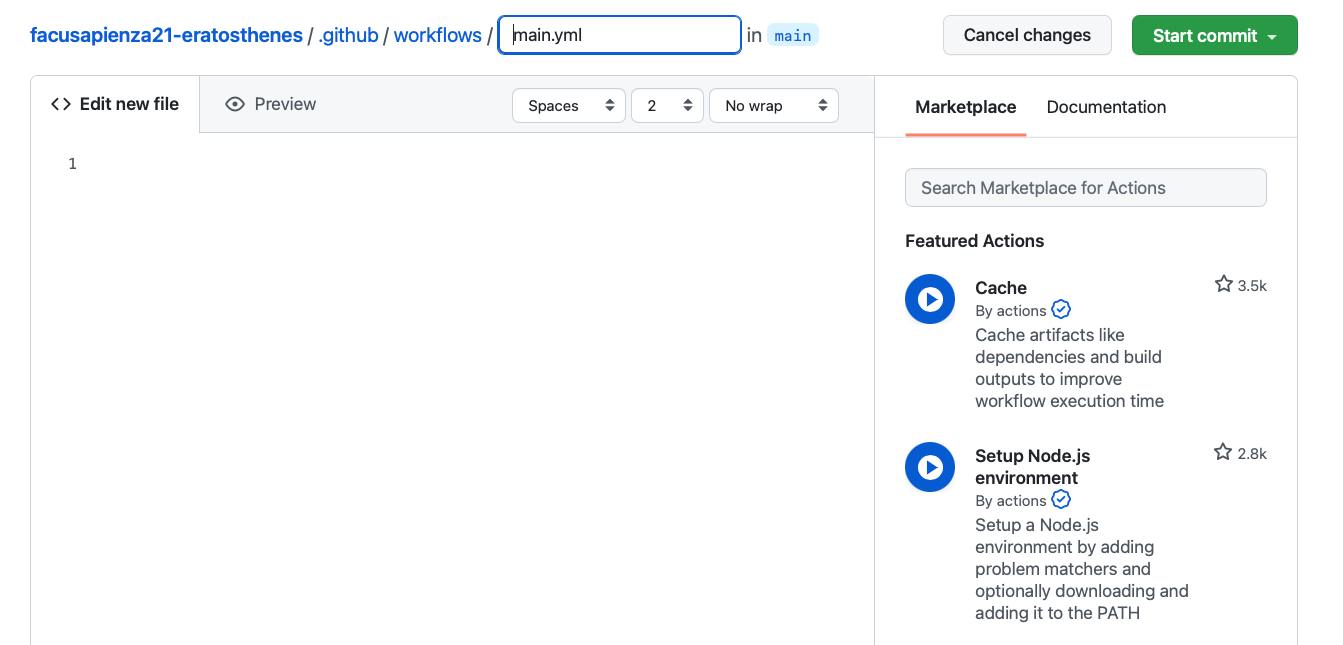

Now, this is where we specified the specific task we want to automate. We will call our workflow `test` and inside it we will include the following piece of code
```yml
name: Python package

on: [push]

jobs:
  build:

    runs-on: ubuntu-latest
    strategy:
      matrix:
        python-version: ["3.9"]

    steps:
      - uses: actions/checkout@v3
      - name: Set up Python ${{ matrix.python-version }}
        uses: actions/setup-python@v4
        with:
          python-version: ${{ matrix.python-version }}
      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install flake8 pytest
          if [ -f test-requirements.txt ]; then pip install -r test-requirements.txt; fi
      - name: Lint with flake8
        run: |
          # stop the build if there are Python syntax errors or undefined names
          flake8 . --count --select=E9,F63,F7,F82 --show-source --statistics
          # exit-zero treats all errors as warnings. The GitHub editor is 127 chars wide
          flake8 . --count --exit-zero --max-complexity=10 --max-line-length=127 --statistics
      - name: Test with pytest
        run: |
          pytest
```

Configuration `yml` files are in general difficult to write, but it is important that we can recognize some basic elements:
- Python version GitHub will use for the tests
- Operating system
- Installation of dependencies 
- Execution of `pytest`

After you have done this, next time you make a new push you will see a tab in `Action` that will show if your test had passed or not. 

## References

- [Carpentries - Python Testing and Continouos Integration](https://carpentries-incubator.github.io/python-testing/)
- [Real Python - Testing](https://realpython.com/python-testing/)
- [GitHub - Building and Testing Python](https://carpentries-incubator.github.io/python-testing/)